In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.measure import compare_psnr
import math
from scipy.ndimage import median

In [2]:
woman_img = cv2.imread("woman.png", cv2.IMREAD_GRAYSCALE)
plt.rcParams['figure.figsize'] = [13, 13]
plt.rcParams['font.size'] = 15

In [3]:
# A laplacian of gaussian is a gaussian blur technique applied to a laplacian
# We first take a gaussian blur and then the laplacian
# gauss of variance 0 helps us build a less noisy example from OpenCV docs
gauss = cv2.GaussianBlur(woman_img, (5, 5), math.sqrt(0))
log = cv2.Laplacian(gauss, cv2.CV_64F)

In [4]:
w, h = log.shape
output = np.zeros_like(log)
# Padding values around photo for processing
padded_log = np.pad(log, ((1, 1), (1, 1)), 'edge')
# Threshold we filter by because of potential noise
thold = np.absolute(log).mean() * 1.4

# We loop through image and process it pixel by pixel
# if there is a negative value in the neighborhood of pixel we are looking at 
# and the pixel itself is positive then a zero crossing exists and we denote it
# with a 1, otherwise we leave it as a zero
for i in range(1, w):
    for j in range(1, h):
        neigh = padded_log[i - 1:i + 2, j - 1:j + 2]
        n_sign = np.sign(neigh)
        n_max = neigh.max()
        n_min = neigh.min()
        n_sign_max = n_sign.max()
        n_sign_min = n_sign.min()
        elem = padded_log[i][j]
        if n_sign_max == n_sign_min:
            continue
    
        if n_sign[1][1] > n_sign_min:
            if (elem - n_min) > thold: 
                output[i][j] = 1

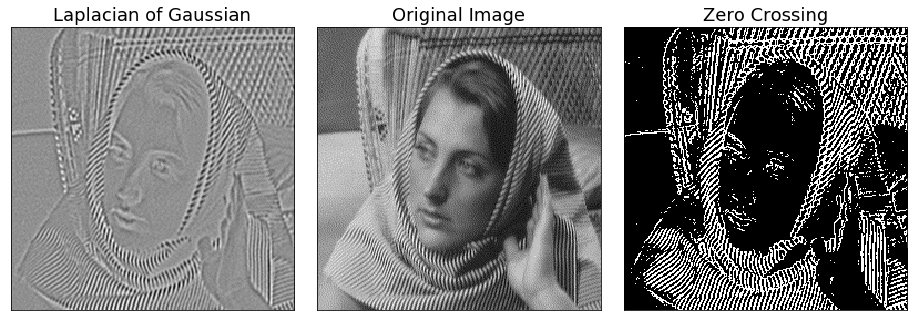

In [5]:
plt.subplot(131), plt.imshow(log, cmap="gray")
plt.title("Laplacian of Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(woman_img, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(output, cmap="gray")
plt.title("Zero Crossing"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()